# COVID-19 Genome Analysis using Biopython

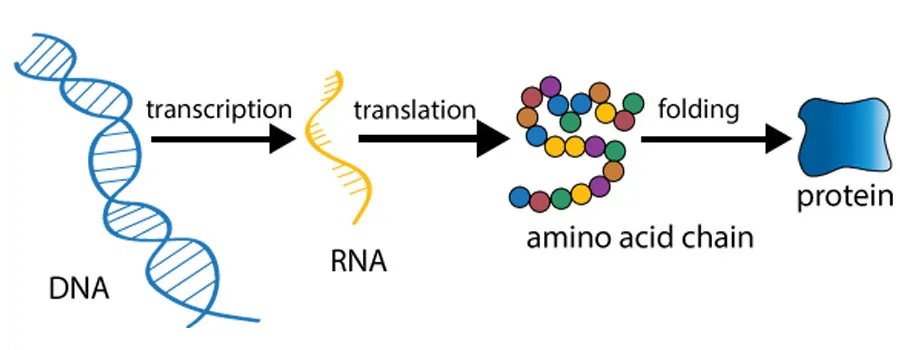

### Fetch COVID-19 Genome from NCBI
**MN908947** - covid-19 genome used here was sequenced from a sample of bronchoalveolar lavage fluid from a single patient who was a worker at the market and who was admitted to the Central Hospital of Wuhan on 26 December 2019

In [ ]:
pip install biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 9.0 MB/s eta 0:00:00


In [ ]:
from Bio import Entrez, SeqIO
handle = Entrez.efetch(db="nucleotide", id="MN908947", rettype="gb", retmode="text")
recs = list(SeqIO.parse(handle, 'gb'))

# https://www.ncbi.nlm.nih.gov/nuccore/MN908947.3/

In [ ]:
recs

[SeqRecord(seq=Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA'), id='MN908947.3', name='MN908947', description='Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome', dbxrefs=[])]

In [ ]:
covid_dna = recs[0].seq

In [ ]:
covid_dna

Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA')

In [ ]:
print(f'The genome of Covid-19 consists of {len(covid_dna)} nucleotides.')

The genome of Covid-19 consists of 29903 nucleotides.


In [ ]:
# molecular weight
from Bio.SeqUtils import molecular_weight
molecular_weight(covid_dna)

9241219.214400413

In [ ]:
pip install SeqUtils

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.4/43.4 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.5/283.5 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.5/147.5 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.5/575.5 kB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54

In [ ]:
pip install git+https://github.com/nextgenusfs/funannotate.git --upgrade --force --no-deps

  Cloning https://github.com/nextgenusfs/funannotate.git to /tmp/pip-req-build-50msbpq5
  Running command git clone --filter=blob:none --quiet https://github.com/nextgenusfs/funannotate.git /tmp/pip-req-build-50msbpq5
  Resolved https://github.com/nextgenusfs/funannotate.git to commit a6dc154d9652ba48b03a76e76573946b4e23427c
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of funannotate to determine which version is compatible with other requirements. This could take a while.
ERROR: Package 'funannotate' requires a different Python: 3.10.12 not in '<3.10,>=3.6.0'


In [ ]:
# GC content - higher GC content implies more stable molecule due to G and C forming triple hydrogen bonds
# GC içeriği - daha yüksek GC içeriği, G ve C'nin üçlü hidrojen bağları oluşturması nedeniyle daha kararlı molekül anlamına gelir
try:
    from Bio.SeqUtils import gc_fraction
    def GC(sequence):
        return 100 * gc_fraction(sequence, ambiguous="ignore")
except ImportError:
    # Older versions have this:
    from Bio.SeqUtils import GC

#from Bio.SeqUtils import GC
GC(covid_dna)

37.97277865097147

### Distribution of nucleotides in COVID-19 genome

In [ ]:
count_nucleotides = {
    'A': covid_dna.count('A'),
    'T': covid_dna.count('T'),
    'C': covid_dna.count('C'),
    'G': covid_dna.count('G')
}

In [ ]:
count_nucleotides

{'A': 8954, 'T': 9594, 'C': 5492, 'G': 5863}

Text(0.5, 1.0, 'Nucleotide Frequency')

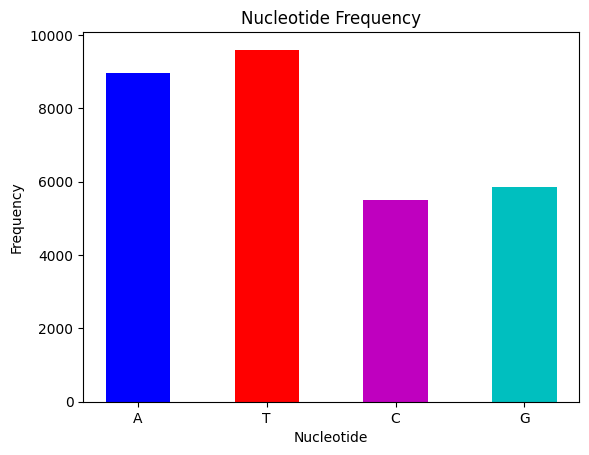

In [ ]:
import matplotlib.pyplot as plt
width = 0.5
plt.bar(count_nucleotides.keys(), count_nucleotides.values(), width, color=['b', 'r', 'm', 'c'])
plt.xlabel('Nucleotide')
plt.ylabel('Frequency')
plt.title('Nucleotide Frequency')

First observation: The frequency of the nucleotides A and T is higher than the frequency of C and G.

### Genetic Information - Gene Expression - Protein

Understanding this **genetic information** is the key to find cures and vaccines. So, the question here is: How do we extract information from this long sequence of letters?

This process is called **gene expression**: Gene expression is the process by which information from **a gene** is used in the synthesis of a functional **gene product**. These products are often **proteins**

### Transcription
Transcription is the first step in gene expression. It involves copying a gene's DNA sequence to make an RNA molecule.

In [ ]:
covid_mrna = covid_dna.transcribe()
covid_mrna
#thymine will be replaced by uracil

Seq('AUUAAAGGUUUAUACCUUCCCAGGUAACAAACCAACCAACUUUCGAUCUCUUGU...AAA')

### Translation
Translation is the process that takes the information passed from DNA as messenger RNA and turns it into a series of amino acids.

In [ ]:
covid_aa = covid_mrna.translate()
covid_aa

/usr/local/lib/python3.10/dist-packages/Bio/Seq.py:2879: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


Seq('IKGLYLPR*QTNQLSISCRSVL*TNFKICVAVTRLHA*CTHAV*LITNYCR*QD...KKK')

In [ ]:
#most common amino acids
from collections import Counter
common_amino = Counter(covid_aa)
common_amino.most_common(10)

[('L', 886),
 ('S', 810),
 ('*', 774),
 ('T', 679),
 ('C', 635),
 ('F', 593),
 ('R', 558),
 ('V', 548),
 ('Y', 505),
 ('N', 472)]

Text(0.5, 1.0, 'Protein Sequence Frequency')

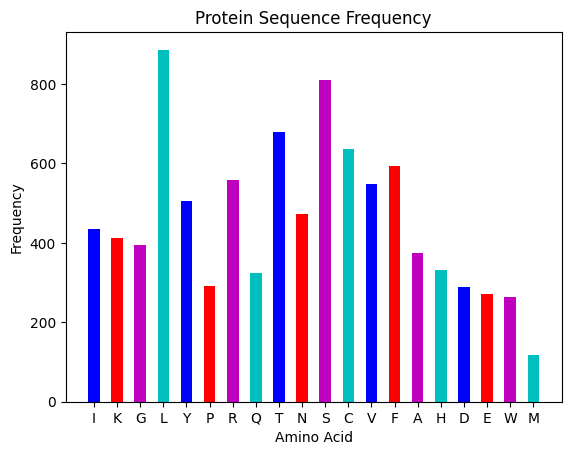

In [ ]:
del common_amino['*']

width = 0.5
plt.bar(common_amino.keys(), common_amino.values(), width, color=['b', 'r', 'm', 'c'])
plt.xlabel('Amino Acid')
plt.ylabel('Frequency')
plt.title('Protein Sequence Frequency')

In [ ]:
print(f"Covid-19's genome has {sum(common_amino.values())} amino acids")

Covid-19's genome has 9193 amino acids


The split() function splits the sequence at any stop codon and keeps the amino acids chains separated. This makes it easier for further analysis.

In [ ]:
proteins = covid_aa.split('*')

In [ ]:
proteins[:5]

[Seq('IKGLYLPR'),
 Seq('QTNQLSISCRSVL'),
 Seq('TNFKICVAVTRLHA'),
 Seq('CTHAV'),
 Seq('LITNYCR')]

In [ ]:
print(f'We have {len(proteins)} amino acids in the covid-19 genome')

We have 775 amino acids in the covid-19 genome


It's worth to mention that not all the amino acids sequences are proteins. Only the sequences with more than 20 amino acids code for functional proteins. The short amino acid sequences are oligopeptides and have other functionalities. Here, we will focus on the chains with more than 20 amino acid chains: Proteins.

In [ ]:
for protein in proteins:
    if len(protein) < 20:
        proteins.remove(protein)

In [ ]:
print(f'We have {len(proteins)} proteins with more than 20 amino acids in the covid-19 genome')

We have 409 proteins with more than 20 amino acids in the covid-19 genome


In [ ]:
top_5_proteins = sorted(proteins, key = len)

In [ ]:
top_5_proteins

[Seq(''),
 Seq(''),
 Seq(''),
 Seq(''),
 Seq(''),
 Seq(''),
 Seq(''),
 Seq(''),
 Seq(''),
 Seq(''),
 Seq(''),
 Seq(''),
 Seq(''),
 Seq(''),
 Seq(''),
 Seq(''),
 Seq(''),
 Seq(''),
 Seq(''),
 Seq(''),
 Seq(''),
 Seq(''),
 Seq(''),
 Seq(''),
 Seq(''),
 Seq(''),
 Seq(''),
 Seq(''),
 Seq(''),
 Seq(''),
 Seq(''),
 Seq(''),
 Seq(''),
 Seq(''),
 Seq(''),
 Seq('T'),
 Seq('T'),
 Seq('H'),
 Seq('C'),
 Seq('T'),
 Seq('H'),
 Seq('W'),
 Seq('W'),
 Seq('W'),
 Seq('Q'),
 Seq('P'),
 Seq('A'),
 Seq('Y'),
 Seq('W'),
 Seq('I'),
 Seq('I'),
 Seq('P'),
 Seq('I'),
 Seq('N'),
 Seq('A'),
 Seq('E'),
 Seq('L'),
 Seq('L'),
 Seq('R'),
 Seq('L'),
 Seq('L'),
 Seq('F'),
 Seq('L'),
 Seq('V'),
 Seq('V'),
 Seq('L'),
 Seq('F'),
 Seq('L'),
 Seq('A'),
 Seq('R'),
 Seq('L'),
 Seq('F'),
 Seq('SL'),
 Seq('VW'),
 Seq('SE'),
 Seq('KF'),
 Seq('DS'),
 Seq('GY'),
 Seq('ET'),
 Seq('II'),
 Seq('FF'),
 Seq('WR'),
 Seq('NV'),
 Seq('KE'),
 Seq('NC'),
 Seq('LY'),
 Seq('YF'),
 Seq('WC'),
 Seq('SL'),
 Seq('TG'),
 Seq('LC'),
 Seq('EV'),
 Se

In [ ]:
top_5_proteins[-1]

Seq('CTIVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKTNCCRFQ...VNN')

In [ ]:
len(top_5_proteins[-1])
#The largest protein is of length of 2,701 amino acid.

2701

Save this protein to file for further analysis

In [ ]:
with open("protein_seq.fasta", "w") as file:
    file.write(f">covid protein\n{top_5_proteins[-1]}")

## Summary of Findings
- Sequence length: 29,903 base pairs
- GC content: 37.97%
- Has high amount of Leucine L and Serine S
- 409 proteins with more than 20 amino acids
- The largest protein is of length of 2,701 amino acid.
